# Classification de Drapeaux

## Installation des Bibliothèques

In [65]:
# pip install -r requierments.txt

  Using cached torchviz-0.0.2.tar.gz (4.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4139 sha256=28de51a55055916c0842baa4dbb67d004386c3a580612a1390b39a74f3fd77a5
  Stored in directory: c:\users\paulz\appdata\local\packages\pyt

## Importations des bibliothèques

In [1]:
# Importation des packages
import os
import pickle
from PIL import Image
import cv2
import numpy as np

# Imporattion des packages sklearn pour knn et svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC

# Pour les graphique
import matplotlib.pyplot as plt

# PyTorch pour cnn et augmentation d'images
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import v2
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

## Augmentation des données

### Ajout de bruit gaussien

La fonction suivante ajoute aléatoirement des points de couleur sur l'image

In [2]:
def add_gaussian_noise(img, mean = 0, std = 25):

    img=np.array(img)

    noise = np.random.normal(mean, std, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)
    noisy_img=Image.fromarray(noisy_img)

    return noisy_img

### Ajouts des modifications

La fonction génère de nouvelles images suivants les modofications et les sauvegarde.

In [14]:
def img_data_augmentation(img_file, folder_path):

    img = Image.open('flags/%s.png'%img_file).convert('RGB')
    img.thumbnail((512,512))

    bright_transformer = v2.ColorJitter(brightness=1, contrast=1, saturation=0.4)
    rotation_transformer = v2.RandomRotation(degrees=(-20,20))
    blur_transformer = v2.GaussianBlur(kernel_size=15, sigma=(0.1, 5))
    perspective_transformer = v2.RandomPerspective(distortion_scale=0.5, p=1)
    wave_transformer = v2.ElasticTransform(alpha=125)
    
    for i in range(1,11):

        std = round(10**(i/5))
        noise=add_gaussian_noise(img,0,std)
        # noise=Image.fromarray(noise)
        noise.save(f'{folder_path}/{img_file}_noise_{i}.png')
        noise_bright = bright_transformer(noise)
        noise_bright.save(f'{folder_path}/{img_file}_noise_bright_{i}.png')
        noise_rota = rotation_transformer(noise)
        noise_rota.save(f'{folder_path}/{img_file}_noise_rota_{i}.png')
        noise_blur = blur_transformer(noise)
        noise_blur.save(f'{folder_path}/{img_file}_noise_blur_{i}.png')
        noise_per = perspective_transformer(noise)
        noise_per.save(f'{folder_path}/{img_file}_noise_per_{i}.png')
        noise_wave = wave_transformer(noise)
        noise_wave.save(f'{folder_path}/{img_file}_noise_wave_{i}.png')

        bright = bright_transformer(img)
        bright.save(f'{folder_path}/{img_file}_bright_{i}.png')
        bright_rota = rotation_transformer(bright)
        bright_rota.save(f'{folder_path}/{img_file}_bright_rota_{i}.png')
        bright_blur = blur_transformer(bright)
        bright_blur.save(f'{folder_path}/{img_file}_bright_blur_{i}.png')
        bright_per = perspective_transformer(bright)
        bright_per.save(f'{folder_path}/{img_file}_bright_per_{i}.png')
        bright_wave = wave_transformer(bright)
        bright_wave.save(f'{folder_path}/{img_file}_bright_wave_{i}.png')

        rota = rotation_transformer(img)
        rota.save(f'{folder_path}/{img_file}_rota_{i}.png')
        rota_blur = blur_transformer(rota)
        rota_blur.save(f'{folder_path}/{img_file}_rota_blur_{i}.png')
        rota_per = perspective_transformer(rota)
        rota_per.save(f'{folder_path}/{img_file}_rota_per_{i}.png')
        rota_wave = wave_transformer(rota)
        rota_wave.save(f'{folder_path}/{img_file}_rota_wave_{i}.png')

        blur = blur_transformer(img)
        blur.save(f'{folder_path}/{img_file}_blur_{i}.png')
        blur_per = perspective_transformer(blur)
        blur_per.save(f'{folder_path}/{img_file}_blur_per_{i}.png')
        blur_wave = wave_transformer(blur)
        blur_wave.save(f'{folder_path}/{img_file}_blur_wave_{i}.png')

        per = perspective_transformer(img)
        per.save(f'{folder_path}/{img_file}_per_{i}.png')
        per_wave = wave_transformer(per)
        per_wave.save(f'{folder_path}/{img_file}_per_wave_{i}.png')

        wave = wave_transformer(img)
        wave.save(f'{folder_path}/{img_file}_wave_{i}.png')

## Création des données

Sélectionne 10 drapeaux aléatoirements et appelle la fonction d'augmentation d'images.

In [4]:
FLAG_LIST_DIR = 'flag_list.txt'
DATASET_DIR = 'input_data'

with open(FLAG_LIST_DIR, 'r') as f:
    flags = [line[:-1] for line in f]

selected_flags = np.random.choice(flags,10)
# selected_flags = ['bb','fi','gq','id','jm','ma','ng','ni','tn','uy']

# Crée ou détruit le dossier d'inputs
if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)

    for flag in selected_flags:

        flag_dir = '{0}/{1}'.format(DATASET_DIR,flag)

        if os.path.exists(flag_dir) == False:
            os.makedirs(flag_dir)

            img_data_augmentation(flag, flag_dir)

else:
    print('Input Folder already exists.')

Input Folder already exists.


## Pré-traitement des données

In [9]:
def load_images(input_dir):
    images = []
    labels = []

    for folder in os.listdir(input_dir):

        label_folder = os.path.join(input_dir, folder)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(folder)
    return images, labels

images, labels = load_images(DATASET_DIR)
print(len(images), labels)

2100 ['bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb'

In [10]:
def preprocess_images(images, size=(64, 64)):
    preprocessed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size)
        # Flatten the image
        flattened_img = resized_img.flatten()
        preprocessed_images.append(flattened_img)
    return np.array(preprocessed_images)

In [12]:
images, labels = load_images(DATASET_DIR)
images = preprocess_images(images, (32 ,32))
labels = np.array(labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    encoded_labels,
                                                    test_size=0.2,
                                                    random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## k Nearest Neighbour

In [6]:
# Paramètres pour le nombre de voisins
k_par = list(range(1, 31))
param_dict = {'n_neighbors': k_par,
              'weights': ['uniform', 'distance']}
n_cv = 4
# Recherche sur grille avec CV
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier,
                                param_dict,
                                verbose=3,
                                cv=n_cv)
grid_search_knn.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END ....n_neighbors=1, weights=uniform;, score=0.914 total time=   0.0s
[CV 2/4] END ....n_neighbors=1, weights=uniform;, score=0.924 total time=   0.0s
[CV 3/4] END ....n_neighbors=1, weights=uniform;, score=0.898 total time=   0.0s
[CV 4/4] END ....n_neighbors=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 1/4] END ...n_neighbors=1, weights=distance;, score=0.914 total time=   0.0s
[CV 2/4] END ...n_neighbors=1, weights=distance;, score=0.924 total time=   0.0s
[CV 3/4] END ...n_neighbors=1, weights=distance;, score=0.898 total time=   0.0s
[CV 4/4] END ...n_neighbors=1, weights=distance;, score=0.910 total time=   0.0s
[CV 1/4] END ....n_neighbors=2, weights=uniform;, score=0.886 total time=   0.0s
[CV 2/4] END ....n_neighbors=2, weights=uniform;, score=0.898 total time=   0.0s
[CV 3/4] END ....n_neighbors=2, weights=uniform;, score=0.883 total time=   0.0s
[CV 4/4] END ....n_neighbors=2, weights=uniform

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=3)

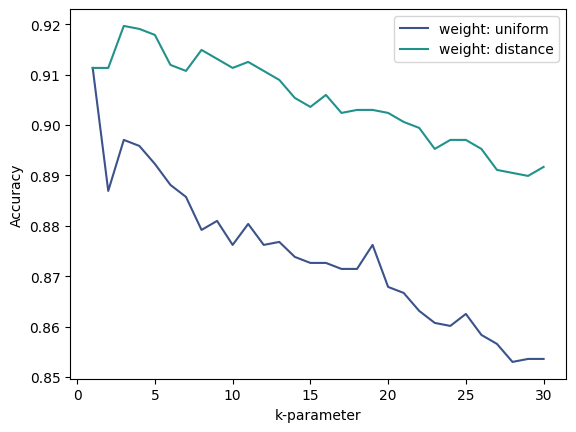

In [7]:
accuracy_uni = grid_search_knn.cv_results_['mean_test_score'][0::2]
accuracy_dist = grid_search_knn.cv_results_['mean_test_score'][1::2]

# diagramme k - accuracy
plt.plot(k_par, accuracy_uni, c='#3b528b', label = 'weight: uniform')
plt.plot(k_par, accuracy_dist, c='#21918c', label = 'weight: distance')
plt.xlabel('k-parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
accuracy_knn_test = grid_search_knn.best_estimator_.score(X_test, y_test)
best_k = grid_search_knn.best_params_['n_neighbors']
best_weights = grid_search_knn.best_params_['weights']
print(f'k-NN: meilleure paramètre k = {best_k}')
print(f'k-NN: meilleure poids: {best_weights}')
print(f'k-NN: meilleure exactitude d\'entrainement = {grid_search_knn.best_score_: .2%}')
print(f'k-NN: meilleure exactitude de test = {accuracy_knn_test: .2%}')

k-NN: meilleure paramètre k = 3
k-NN: meilleure poids: distance
k-NN: meilleure exactitude d'entrainement =  91.96%
k-NN: meilleure exactitude de test =  93.10%


In [117]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
best_knn.fit(X_train, y_train)

y_knn_train = (best_knn.predict(X_train))
y_knn_test = (best_knn.predict(X_test))

#Calcul et affichage de l'exactitude
accuracy_knn_train = accuracy_score(y_train, y_knn_train)
accuracy_knn_test = accuracy_score(y_test, y_knn_test)
print(f'Exactitude: {accuracy_knn_train:.2%} (train) & {accuracy_knn_test:.2%}\
 (test)')

#Calcul et affichage de la precision
precision_knn_train = precision_score(y_train, y_knn_train,
                                      average='weighted')
precision_knn_test = precision_score(y_test, y_knn_test, 
                                     average='weighted')
print(f'Précision: {precision_knn_train:.2%} (train) & {precision_knn_test:.2%}\
 (test)')

#Calcul et affichage du rappel
recall_knn_train = recall_score(y_train, y_knn_train,
                                average='weighted')
recall_knn_test = recall_score(y_test, y_knn_test,
                               average='weighted')
print(f'Rappel: {recall_knn_train:.2%} (train) & {recall_knn_test:.2%} (test)')

#Calcul et affichage des scores f1
f1_knn_train = f1_score(y_train, y_knn_train,
                        average='weighted')
f1_knn_test = f1_score(y_test, y_knn_test, average='weighted')
print(f'Score F1: {f1_knn_train:.2%} (train) & {f1_knn_test:.2%} (test)')

Exactitude: 100.00% (train) & 93.10% (test)
Précision: 100.00% (train) & 93.57% (test)
Rappel: 100.00% (train) & 93.10% (test)
Score F1: 100.00% (train) & 93.12% (test)


In [19]:
# Sauvegarde du modèle
MODELS_DIR = 'models'
os.makedirs(MODELS_DIR, exist_ok=True)

knn_pickle = open(f'{MODELS_DIR}/knn_model', 'wb')
pickle.dump(best_knn, knn_pickle)

## Support Vector Machine

In [11]:
#paramètres du SVC
C = [0.1, 1, 10]
gamma_par = [round(i,4) for i in np.linspace(0.0001, 0.1, 10)]
kernels = ['poly', 'rbf', 'sigmoid']

param_dict = {'C': C,
              'gamma': gamma_par, 
              'kernel': kernels}

#nombre de plis
n_cv = 4

#Cross-validation
svm_classifier = SVC()
grid_search_svm = GridSearchCV(svm_classifier,
                               param_dict,
                               cv=n_cv,
                               verbose = 3
                               )
grid_search_svm.fit(X_train, y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
[CV 1/4] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.105 total time=   2.9s
[CV 2/4] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.105 total time=   4.7s
[CV 3/4] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.102 total time=   6.0s
[CV 4/4] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.102 total time=   3.5s
[CV 1/4] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.848 total time=   3.9s
[CV 2/4] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.800 total time=   3.2s
[CV 3/4] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.819 total time=   2.8s
[CV 4/4] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.795 total time=   3.7s
[CV 1/4] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.771 total time=   3.5s
[CV 2/4] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.740 total time=   3.6s
[CV 3/4] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.762 total time=   3.3s
[CV 4/4] END C=0.1, gamma=0.0001, kernel=sig

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.0001, 0.0112, 0.0223, 0.0334, 0.0445,
                                   0.0556, 0.0667, 0.0778, 0.0889, 0.1],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=3)

[]

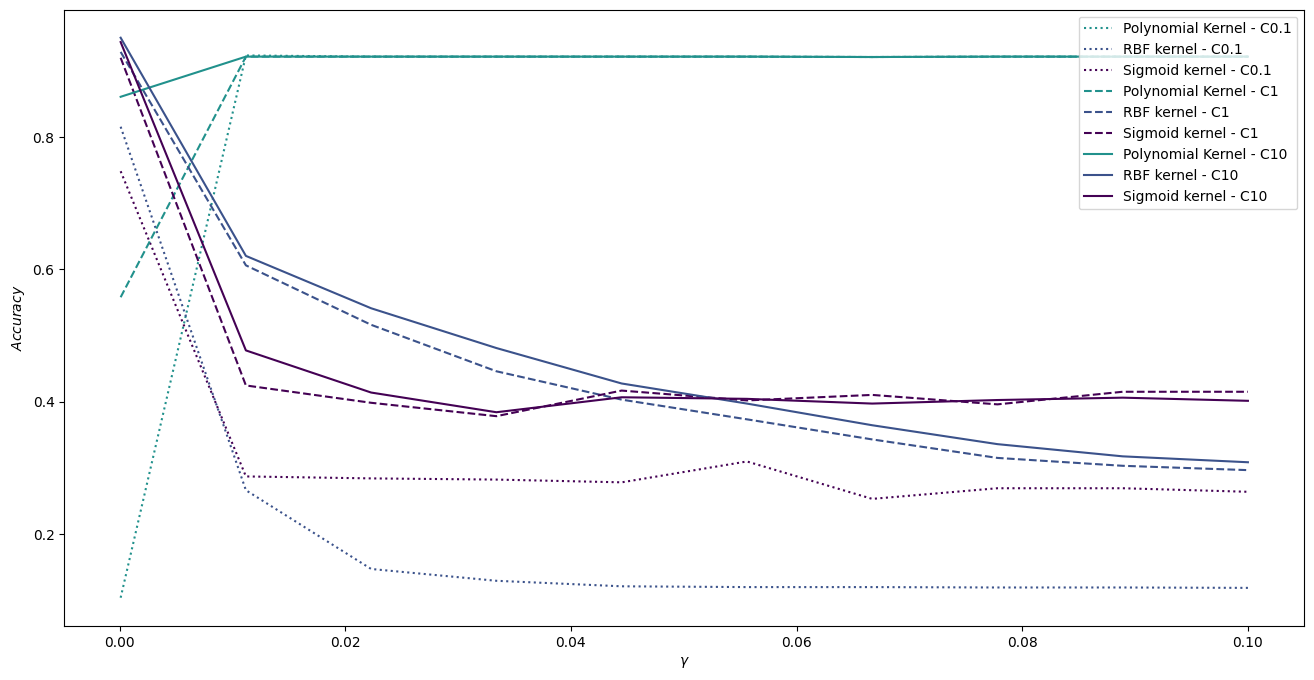

In [12]:
#exactitude moyenne par cv (renvoie une liste des scores avec les trois kernels)
accuracy = grid_search_svm.cv_results_['mean_test_score']

#récupération du score pour chaque kernel C=0.1
poly_accuracy_c1 = accuracy[0::3][0:10]
rbf_accuracy_c1 = accuracy[1::3][0:10]
sig_accuracy_c1 = accuracy[2::3][0:10]

#récupération du score pour chaque kernel C=1
poly_accuracy_c2 = accuracy[0::3][10:20]
rbf_accuracy_c2 = accuracy[1::3][10:20]
sig_accuracy_c2 = accuracy[2::3][10:20]

#récupération du score pour chaque kernel C=10
poly_accuracy_c3 = accuracy[0::3][20:30]
rbf_accuracy_c3 = accuracy[1::3][20:30]
sig_accuracy_c3 = accuracy[2::3][20:30]

#Graphique pour de l'exactitude en fonction de lambda
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(gamma_par, poly_accuracy_c1, c='#21918c', linestyle='dotted', label=f'Polynomial Kernel - C{C[0]}')
ax.plot(gamma_par, rbf_accuracy_c1, c='#3b528b', linestyle='dotted', label=f'RBF kernel - C{C[0]}')
ax.plot(gamma_par, sig_accuracy_c1, c='#440154', linestyle='dotted',label=f'Sigmoid kernel - C{C[0]}')

ax.plot(gamma_par, poly_accuracy_c2, c='#21918c', linestyle='dashed', label=f'Polynomial Kernel - C{C[1]}')
ax.plot(gamma_par, rbf_accuracy_c2, c='#3b528b', linestyle='dashed', label=f'RBF kernel - C{C[1]}')
ax.plot(gamma_par, sig_accuracy_c2, c='#440154', linestyle='dashed', label=f'Sigmoid kernel - C{C[1]}')

ax.plot(gamma_par, poly_accuracy_c3, c='#21918c', label=f'Polynomial Kernel - C{C[2]}')
ax.plot(gamma_par, rbf_accuracy_c3, c='#3b528b', label=f'RBF kernel - C{C[2]}')
ax.plot(gamma_par, sig_accuracy_c3, c='#440154', label=f'Sigmoid kernel - C{C[2]}')

ax.set_xlabel('$\gamma$')
ax.set_ylabel('$Accuracy$')
ax.legend(loc='upper right')
plt.plot()

In [13]:
#SVM avec les meilleurs paramètres
best_kernel = grid_search_svm.best_params_['kernel']
best_gamma = grid_search_svm.best_params_['gamma']
best_C = grid_search_svm.best_params_['C']
accuracy_svm_test = grid_search_svm.best_estimator_.score(X_test, y_test)

#Meilleurs paramètres et exactitude de la cv
print(f'SVM: Meilleures paramètres C: {best_C}')
print(f'SVM: Meilleures kernel: {best_kernel}')
print(f'SVM: Meilleures paramètres gamma: {best_gamma}')
print(f'SVM: Meilleure exactitude d\'entraînement{grid_search_svm.best_score_: .2%} ')
print(f'SVM: Meilleure exactitude de test{accuracy_svm_test: .2%} ')

SVM: Meilleures paramètres C: 10
SVM: Meilleures kernel: rbf
SVM: Meilleures paramètres gamma: 0.0001
SVM: Meilleure exactitude d'entraînement 95.00% 
SVM: Meilleure exactitude de test 95.24% 


In [16]:
best_svm = SVC(C=best_C,kernel=best_kernel, gamma=best_gamma, probability=True)
best_svm.fit(X_train, y_train)

outputs_svm_train = (best_svm.predict(X_train))
outputs_svm_test = (best_svm.predict(X_test))

#Calcul et affichage de l'exactitude
accuracy_svm_train = accuracy_score(y_train, outputs_svm_train)
accuracy_svm_test = accuracy_score(y_test, outputs_svm_test)
print(f'Exactitude: {accuracy_svm_train:.2%} (train) & {accuracy_svm_test:.2%}\
 (test)')

#Calcul et affichage de la precision
precision_svm_train = precision_score(y_train, outputs_svm_train,
                                      average='weighted')
precision_svm_test = precision_score(y_test, outputs_svm_test, 
                                     average='weighted')
print(f'Précision: {precision_svm_train:.2%} (train) & {precision_svm_test:.2%}\
 (test)')

#Calcul et affichage du rappel
recall_svm_train = recall_score(y_train, outputs_svm_train,
                                average='weighted')
recall_svm_test = recall_score(y_test, outputs_svm_test,
                               average='weighted')
print(f'Rappel: {recall_svm_train:.2%} (train) & {recall_svm_test:.2%} (test)')

#Calcul et affichage des scores f1
f1_svm_train = f1_score(y_train, outputs_svm_train,
                        average='weighted')
f1_svm_test = f1_score(y_test, outputs_svm_test, average='weighted')
print(f'Score F1: {f1_svm_train:.2%} (train) & {f1_svm_test:.2%} (test)')

Exactitude: 97.38% (train) & 95.24% (test)
Précision: 97.75% (train) & 96.20% (test)
Rappel: 97.38% (train) & 95.24% (test)
Score F1: 97.47% (train) & 95.43% (test)


In [20]:
#  Sauvegarde du modèle SVM
svm_pickle = open(f'{MODELS_DIR}/svm_model', 'wb')
pickle.dump(best_svm, svm_pickle)

## Convolutional Neural Network

In [5]:
# Check si une carte graphique compatible est diponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [6]:
# Pré-traitement pour cnn
input_dataset = datasets.ImageFolder(root=DATASET_DIR,
                                     transform=transforms.Compose([
                                        transforms.Resize((32, 32)),
                                        transforms.ToTensor()]))

image_mean = torch.stack([t.mean(1).mean(1) for t, c in input_dataset]).mean(0)
image_std = torch.stack([t.std(1).std(1) for t, c in input_dataset]).mean(0)
print(f'mean: {image_mean}, std: {image_std}')

input_transform = transforms.Compose([transforms.Resize((32, 32)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=image_mean, std=image_std)])

input_dataset = datasets.ImageFolder(root=DATASET_DIR,
                                     transform = input_transform)

seed = torch.Generator().manual_seed(1)
train_dataset, valid_dataset = random_split(input_dataset, [0.8, 0.2], generator=seed)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

num_classes = len(input_dataset.classes)
print(num_classes)

mean: tensor([0.5116, 0.4417, 0.4458]), std: tensor([0.0748, 0.0705, 0.0626])
10


In [17]:
# Création du modèle resnet18
model = models.resnet18(weights='DEFAULT')
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

# fonction de perte et optimisateur
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
CHECKPOINTS_DIR = 'checkpoints'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

In [177]:
num_epochs = 20

# Listes pour enregistrer les pertes moyennes
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(1,num_epochs+1):

  # ---- Entrainement

    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logit_outputs = model(inputs)
        loss = criterion(logit_outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_correct += (logit_outputs.argmax(1) == labels).sum().item()

    # ---- Validation

    model.eval()
    valid_loss = 0
    valid_correct = 0

    for inputs, labels in valid_loader:


        inputs = inputs.to(device)
        labels = labels.to(device)


        logit_outputs = model(inputs)
        loss = criterion(logit_outputs, labels)


        valid_loss += loss.item()
        valid_correct += (logit_outputs.argmax(1) == labels).sum().item()

    # Affichage 

    # Calcul de la perte moyenne et exactitude moyenne
    train_mean_loss = train_loss / len(train_loader.dataset)
    valid_mean_loss = valid_loss / len(valid_loader.dataset)
    train_mean_accuracy = train_correct / len(train_loader.dataset)
    valid_mean_accuracy = valid_correct / len(valid_loader.dataset)


    # Ajouter les pertes moyennes aux listes
    train_losses.append(train_mean_loss)
    valid_losses.append(valid_mean_loss)
    train_accuracies.append(train_mean_accuracy)
    valid_accuracies.append(valid_mean_accuracy)

    # Print
    print(f'Epoch {epoch}/{num_epochs} : '
              f'train loss = {train_mean_loss:.4f}, '
              f'train accuracy = {train_mean_accuracy:.3%}, '
              f'valid loss = {valid_mean_loss:.4f}, '
              f'valid accuracy = {valid_mean_accuracy:.3%}.')

    # Engistrement
    torch.save({'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_tat_dict': optimizer.state_dict(),
                'train_loss': train_mean_loss,
                'valid_loss': valid_mean_loss,
                'train_accuracy': train_mean_accuracy,
                'valid_accuracy': valid_mean_accuracy}, 
               f'{CHECKPOINTS_DIR}/model_{epoch}.pt')
                                       

Epoch 1/20 : train loss = 0.0203, train accuracy = 80.595%, valid loss = 0.0033, valid accuracy = 97.857%.
Epoch 2/20 : train loss = 0.0041, train accuracy = 96.310%, valid loss = 0.0027, valid accuracy = 98.095%.
Epoch 3/20 : train loss = 0.0034, train accuracy = 96.905%, valid loss = 0.0017, valid accuracy = 98.571%.
Epoch 4/20 : train loss = 0.0029, train accuracy = 97.381%, valid loss = 0.0014, valid accuracy = 98.810%.
Epoch 5/20 : train loss = 0.0023, train accuracy = 98.036%, valid loss = 0.0010, valid accuracy = 99.048%.
Epoch 6/20 : train loss = 0.0018, train accuracy = 98.274%, valid loss = 0.0011, valid accuracy = 98.810%.
Epoch 7/20 : train loss = 0.0019, train accuracy = 98.393%, valid loss = 0.0009, valid accuracy = 99.048%.
Epoch 8/20 : train loss = 0.0013, train accuracy = 98.750%, valid loss = 0.0008, valid accuracy = 99.048%.
Epoch 9/20 : train loss = 0.0013, train accuracy = 98.810%, valid loss = 0.0009, valid accuracy = 99.286%.
Epoch 10/20 : train loss = 0.0010, tr

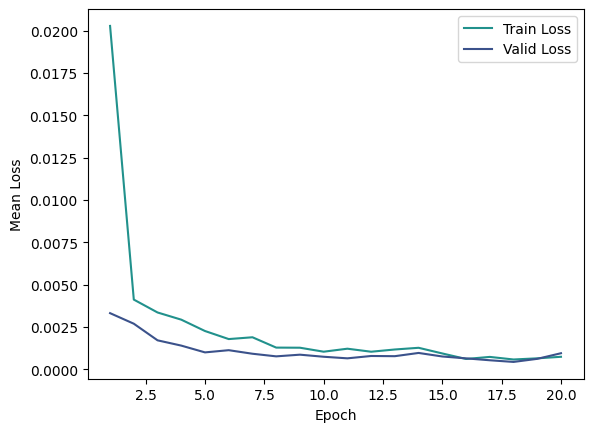

In [182]:
# Graph de la perte des moyennes
plt.figure()
plt.plot(range(1, num_epochs + 1),  train_losses, c='#21918c', label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, c='#3b528b', label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
# plt.title('Perte moyenne par Epoch')
plt.legend()
plt.show()

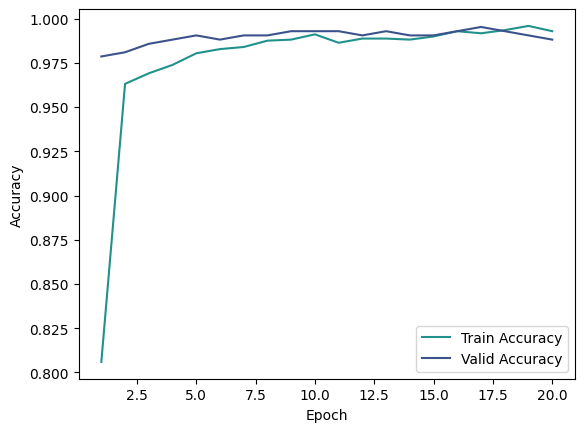

In [183]:
# Graph de la perte des moyennes
plt.figure()
plt.plot(range(1, num_epochs + 1),  train_accuracies, c='#21918c', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), valid_accuracies, c='#3b528b', label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('Accuracy par Epoch')
plt.legend()
plt.show()

In [186]:
best_epoch = valid_accuracies.index(max(valid_accuracies)) + 1
print(f'Meilleur Epoch : {best_epoch}')

Meilleur Epoch : 17


In [212]:
best_checkpoint = torch.load(f'{CHECKPOINTS_DIR}/model_{best_epoch}.pt')
torch.save(best_checkpoint, f'{MODELS_DIR}/resnet_model.pt')
best_cnn = models.resnet18(weights='DEFAULT')
best_cnn.fc = nn.Linear(num_features, num_classes)
best_cnn.load_state_dict(best_checkpoint['model_state_dict'])
best_valid_accuracy = best_checkpoint['valid_accuracy']
print(f'CNN : Meilleur exactitude de validation: {best_valid_accuracy:.2%}')

CNN : Meilleur exactitude de validation: 99.52%


In [213]:
TEST_DIR = 'C:/Users/paulz/Desktop/projet_master/test_data'

test_dataset = datasets.ImageFolder(root=TEST_DIR,
                                     transform = input_transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [214]:
best_cnn.eval()
best_cnn.to(device)

test_correct = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        logit_outputs = best_cnn(inputs)
        preds = logit_outputs.argmax(1)
        
        test_correct += (preds == labels).sum().item()
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculer l'accuracy, la précision, le rappel et le score F1
test_accuracy = test_correct / len(test_loader.dataset)
test_precision = precision_score(all_labels, all_preds, average='weighted')
test_recall = recall_score(all_labels, all_preds, average='weighted')
test_f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Exactitude:  {test_accuracy:.2%}')
print(f'Precision: {test_precision:.2%}')
print(f'Rappel: {test_recall:.2%}')
print(f'Score F1: {test_f1:.2%}')

Exactitude:  99.14%
Precision: 99.17%
Rappel: 99.14%
Score F1: 99.14%


## Comparaison des augmentations

### Création d'un nouveau jeu de données

In [16]:
MODIFS_TEST_DIR = 'modif_test'

selected_flags = ['bb','fi','gq','id','jm','ma','ng','ni','tn','uy']

# modificateurs
bright_transformer = v2.ColorJitter(brightness=1, contrast=1, saturation=0.4)
rotation_transformer = v2.RandomRotation(degrees=(-20,20))
blur_transformer = v2.GaussianBlur(kernel_size=15, sigma=(0.1, 5))
perspective_transformer = v2.RandomPerspective(distortion_scale=0.5, p=1)
wave_transformer = v2.ElasticTransform(alpha=125)

modif_dict = {'blur' : blur_transformer,
              'bright' : bright_transformer,
              'noise' : add_gaussian_noise,
              'perspective' : perspective_transformer,
              'rotation': rotation_transformer,
              'wave' : wave_transformer}
# Crée ou détruit le dossier d'inputs
if not os.path.exists(MODIFS_TEST_DIR):
    os.makedirs(MODIFS_TEST_DIR)

    for name, modif in modif_dict.items():
        print(name, modif)
        modif_dir = f'{MODIFS_TEST_DIR}/{name}' 

        os.makedirs(modif_dir, exist_ok=True)   

        for flag in selected_flags: 

            flag_dir = f'{modif_dir}/{flag}'
            os.makedirs(flag_dir, exist_ok=True)    

            img = Image.open(f'flags/{flag}.png').convert('RGB')    

            for i in range(1,11):

                mod_img = modif(img)
                mod_img.save(f'{flag_dir}/{flag}_{i}.png')
else:
    print('Test Folder already exists.')

Test Folder already exists.


### Tests de chaque jeu

In [17]:
# Chargement des modèles
MODELS_DIR = 'C:/Users/paulz/Desktop/projet_master/models'
knn_load = open(f'{MODELS_DIR}/knn_model', 'rb')
svm_load = open(f'{MODELS_DIR}/svm_model', 'rb')
best_knn = pickle.load(knn_load)
best_svm = pickle.load(svm_load)
best_checkpoint = torch.load(f'{MODELS_DIR}/resnet_model.pt')
best_cnn = models.resnet18(weights='DEFAULT')
best_cnn.fc = nn.Linear(512, 10)
best_cnn.load_state_dict(best_checkpoint['model_state_dict'])

# Listes pour enregistrer les résultats
modifications = []
knn_accuracies = []
svm_accuracies = []
cnn_accuracies = []

for modif in os.listdir(MODIFS_TEST_DIR):
    
    # Ajouter la modification actuelle à la liste
    modifications.append(modif)
    
    # Traitement des données (kNN & SVM)
    images, labels = load_images(f'{MODIFS_TEST_DIR}/{modif}')
    test_images = preprocess_images(images, (32 ,32))
    labels = np.array(labels)

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    test_images = scaler.transform(test_images)
    
    # Test avec kNN
    knn_test_pred = best_knn.predict(test_images)
    knn_test_accuracy = accuracy_score(encoded_labels, knn_test_pred)
    knn_accuracies.append(knn_test_accuracy)
    print(f'{modif} | k-NN | accuracy: {knn_test_accuracy:.2%}')
    
    # Test avec SVM
    svm_test_pred = best_svm.predict(test_images)
    svm_test_accuracy = accuracy_score(encoded_labels, svm_test_pred)
    svm_accuracies.append(svm_test_accuracy)
    print(f'{modif} | SVM | accuracy: {svm_test_accuracy:.2%}')
    
    # Test avec CNN
    modif_test_dataset = datasets.ImageFolder(root=f'{MODIFS_TEST_DIR}/{modif}',
                                        transform = input_transform)

    modif_test_loader = DataLoader(modif_test_dataset, batch_size=32, shuffle=True)

    best_cnn.eval()
    best_cnn.to(device)

    modif_test_correct = 0
    for inputs, labels in modif_test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      logit_outputs = best_cnn(inputs)
      modif_test_correct += (logit_outputs.argmax(1) == labels).sum().item()

    cnn_test_accuracy = modif_test_correct / len(modif_test_loader.dataset)
    cnn_accuracies.append(cnn_test_accuracy)
    print(f'{modif} | CNN | accuracy: {cnn_test_accuracy:.2%}')


blur | k-NN | accuracy: 100.00%
blur | SVM | accuracy: 100.00%
blur | CNN | accuracy: 100.00%
bright | k-NN | accuracy: 87.00%
bright | SVM | accuracy: 87.00%
bright | CNN | accuracy: 99.00%
noise | k-NN | accuracy: 100.00%
noise | SVM | accuracy: 100.00%
noise | CNN | accuracy: 100.00%
perspective | k-NN | accuracy: 90.00%
perspective | SVM | accuracy: 100.00%
perspective | CNN | accuracy: 100.00%
rotation | k-NN | accuracy: 100.00%
rotation | SVM | accuracy: 100.00%
rotation | CNN | accuracy: 100.00%
wave | k-NN | accuracy: 100.00%
wave | SVM | accuracy: 100.00%
wave | CNN | accuracy: 100.00%


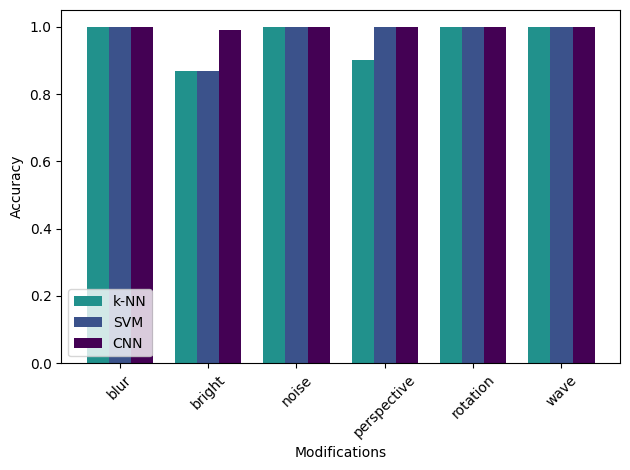

In [18]:
# Barplot des Exactitudes selon modif & modèles

# Affichage des résultats dans un barplot
x = np.arange(len(modifications))  # position des labels sur l'axe x
width = 0.25  # largeur des barres

fig, ax = plt.subplots()
bar1 = ax.bar(x - width, knn_accuracies, width, color='#21918c', label='k-NN')
bar2 = ax.bar(x, svm_accuracies, width, color='#3b528b', label='SVM')
bar3 = ax.bar(x + width, cnn_accuracies, width, color='#440154', label='CNN')

# Ajouter des étiquettes, un titre et une légende
ax.set_xlabel('Modifications')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(modifications)
ax.legend(loc='lower left')

plt.xticks(rotation=45)  # Faire pivoter les labels pour les rendre lisibles
plt.tight_layout()
plt.show()


## Test pour une image

permet de tester les prédictions des modèles sur une images.

In [67]:
TEST_PATH = ''
iso = ['bb','fi','gq','id','jm','ma','ng','ni','tn','uy']

In [51]:
img = Image.open(TEST_PATH).convert('RGB')
img_tensor = input_transform(img).unsqueeze(0)

logodd = model(img_tensor.to(device))
prob = torch.nn.functional.softmax(logodd, dim=1)[0]
_, indices = torch.sort(prob, descending=True)

for i in indices:
  print(iso[i], f': {prob[i].item():.2%}')

ma : 95.20%
tn : 2.12%
bb : 1.72%
jm : 0.34%
uy : 0.17%
ng : 0.15%
gq : 0.11%
id : 0.09%
fi : 0.05%
ni : 0.04%


In [71]:
test_img = cv2.imread(TEST_PATH)
test_img = preprocess_images([test_img], (32 ,32))
test_img = scaler.transform(test_img)

knn_prob = best_knn.predict_proba(test_img)

for i,prob in enumerate(knn_prob[0]):
  print(iso[i], f': {prob:.2%}')

bb : 0.00%
fi : 0.00%
gq : 0.00%
id : 0.00%
jm : 0.00%
ma : 100.00%
ng : 0.00%
ni : 0.00%
tn : 0.00%
uy : 0.00%


In [74]:
svm_prob = best_svm.predict_proba(test_img)
for i,prob in enumerate(svm_prob[0]):
  print(iso[i], f': {prob:.2%}')

bb : 0.01%
fi : 0.03%
gq : 0.01%
id : 0.14%
jm : 0.00%
ma : 94.09%
ng : 0.02%
ni : 0.00%
tn : 5.68%
uy : 0.01%
